In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe 
from highlight_text import fig_text



In [3]:
df = pd.read_csv('understat_all_shots.csv')
df.head(10)

,X,Y,a_goals,a_team,date,h_a,h_goals,h_team,id,lastAction,match_id,minute,player,player_assisted,player_id,result,season,shotType,situation,xG
0,0.707,0.379,0,Hoffenheim,29-08-2015 17:30,h,0,Darmstadt,76737,Aerial,1044,93,György Garics,NaN,2,MissedShots,2015,RightFoot,FromCorner,0.011869
1,0.728,0.373,1,Darmstadt,12-09-2015 17:30,a,0,Bayer Leverkusen,76808,Pass,1053,1,György Garics,Konstantin Rausch,2,SavedShot,2015,RightFoot,SetPiece,0.015980
2,0.016,0.464,0,Darmstadt,01-11-2015 18:30,a,2,VfB Stuttgart,78492,Foul,1118,67,György Garics,NaN,2,OwnGoal,2015,Head,SetPiece,0.000000
3,0.875,0.521,2,Darmstadt,20-12-2015 20:30,a,3,Borussia M.Gladbach,79876,Aerial,1173,58,György Garics,NaN,2,MissedShots,2015,Head,FromCorner,0.016684
4,0.927,0.557,2,Werder Bremen,07-12-2014 16:30,a,5,Eintracht Frankfurt,27374,Pass,5320,78,Luca Caldirola,Fin Bartels,3,Goal,2014,LeftFoot,OpenPlay,0.432700
5,0.899,0.598,2,Darmstadt,27-09-2015 19:30,a,2,Borussia Dortmund,77444,None,1083,11,Luca Caldirola,NaN,3,MissedShots,2015,RightFoot,SetPiece,0.072897
6,0.980,0.472,2,Darmstadt,17-10-2015 17:30,a,0,Augsburg,78030,None,1094,28,Luca Caldirola,NaN,3,BlockedShot,2015,LeftFoot,FromCorner,0.794784
7,0.984,0.476,2,Darmstadt,17-10-2015 17:30,a,0,Augsburg,78029,Rebound,1094,28,Luca Caldirola,Jan Rosenthal,3,SavedShot,2015,LeftFoot,FromCorner,0.946339
8,0.885,0.433,0,Darmstadt,01-11-2015 18:30,a,2,VfB Stuttgart,78500,Cross,1118,86,Luca Caldirola,Mario Vrancic,3,SavedShot,2015,LeftFoot,OpenPlay,0.065162
9,0.942,0.635,0,Darmstadt,01-11-2015 18:30,a,2,VfB Stuttgart,78501,Aerial,1118,87,Luca Caldirola,Tobias Kempe,3,SavedShot,2015,Head,FromCorner,0.013303


In [25]:
g

situation,OpenPlay,Penalty,DirectFreekick,FromCorner,SetPiece
player,,,,,
Lionel Messi,130.0,20.0,20.0,5.0,1.0
Cristiano Ronaldo,106.0,30.0,4.0,12.0,4.0
Robert Lewandowski,102.0,19.0,3.0,7.0,3.0
Luis Suárez,110.0,8.0,1.0,9.0,3.0
Harry Kane,81.0,19.0,1.0,12.0,12.0
Edinson Cavani,90.0,18.0,3.0,2.0,7.0
Pierre-Emerick Aubameyang,98.0,15.0,0.0,5.0,2.0
Sergio Agüero,88.0,20.0,0.0,5.0,5.0
Gonzalo Higuaín,96.0,7.0,0.0,2.0,1.0


In [68]:
g = df.query("result == 'Goal'").groupby(['player', 'situation'])\
                                .agg({'result':'count'})\
                                .reset_index()\
                                .pivot(index='player', columns='situation', values='result')\
                                .fillna(0)


g['total'] = g[g.columns].sum(axis=1)
g = g.sort_values('total', ascending=False).head(10)
g= g[['OpenPlay', 'Penalty', 'DirectFreekick', 'FromCorner', 'SetPiece', 'total']]
g.head(3)

situation,OpenPlay,Penalty,DirectFreekick,FromCorner,SetPiece,total
player,,,,,,
Lionel Messi,130.0,20.0,20.0,5.0,1.0,176.0
Cristiano Ronaldo,106.0,30.0,4.0,12.0,4.0,156.0
Robert Lewandowski,102.0,19.0,3.0,7.0,3.0,134.0


In [69]:
line_color = 'k'
column_color_dict = {
    'OpenPlay': 'royalblue',
    'Penalty': 'teal',
    'DirectFreekick': 'darkorchid',
    'FromCorner': 'magenta',
    'SetPiece': 'gold',
    'total': 'red' 
}


In [70]:
g[column_color_dict.keys()].iloc[:,:]

situation,OpenPlay,Penalty,DirectFreekick,FromCorner,SetPiece,total
player,,,,,,
Lionel Messi,130.0,20.0,20.0,5.0,1.0,176.0
Cristiano Ronaldo,106.0,30.0,4.0,12.0,4.0,156.0
Robert Lewandowski,102.0,19.0,3.0,7.0,3.0,134.0
Luis Suárez,110.0,8.0,1.0,9.0,3.0,131.0
Harry Kane,81.0,19.0,1.0,12.0,12.0,125.0
Edinson Cavani,90.0,18.0,3.0,2.0,7.0,120.0
Pierre-Emerick Aubameyang,98.0,15.0,0.0,5.0,2.0,120.0
Sergio Agüero,88.0,20.0,0.0,5.0,5.0,118.0
Gonzalo Higuaín,96.0,7.0,0.0,2.0,1.0,106.0


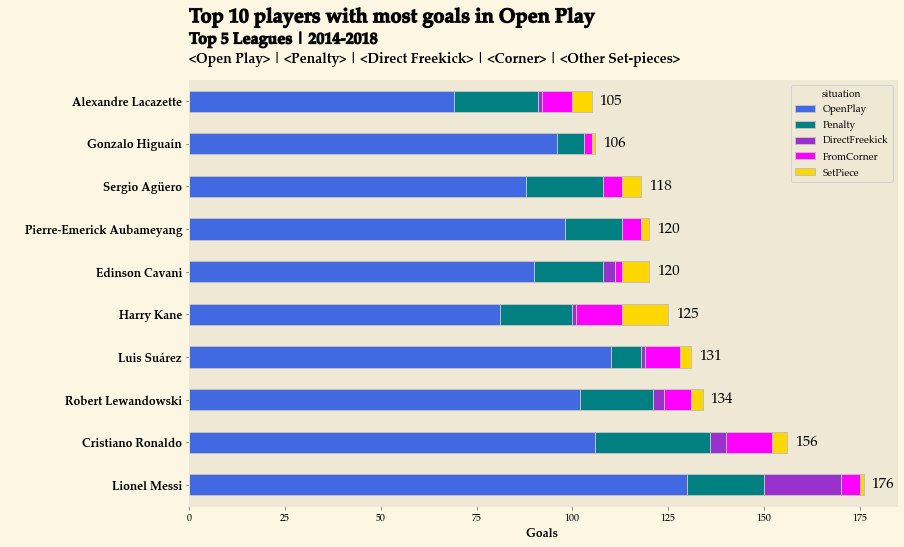

In [74]:
with plt.style.context('Solarize_Light2'):
    plt.rcParams['font.family'] = 'Palatino Linotype'

    fig, ax = plt.subplots(figsize=(12,8))
    ax = g[column_color_dict.keys()].iloc[:,:-1].plot.barh( stacked=True, ax=ax, color=column_color_dict, ec='silver')

    for spines in ['top', 'right']:
        ax.spines[spines].set_visible(False)

    ax.grid(False)
    ax.set_position([0.08, 0.08, 0.82, 0.74])

    for num, total in enumerate(g["total"].iloc[::]):
        ax.text(total+2, num, int(total), ha='left', va='center', fontsize=15)


    ax.set(ylabel= " ", xlabel= "Goals ")
    ax.xaxis.label.set(fontsize=12, fontweight='bold', color=line_color)

    for label in ax.get_yticklabels():
        label.set(color= line_color, fontsize=12, fontweight='bold')
    for t in ax.xaxis.get_ticklabels():
        t.set(color= line_color)


    fig.text(x=0.08, y = 0.92, s= "Top 10 players with most goals in Open Play", fontsize=20, fontweight='bold', 
            color=line_color,  ha = 'left', path_effects=[pe.withStroke(linewidth=1.1, foreground='0.1')])
    
    fig.text(x=0.08, y = 0.883, s="Top 5 Leagues | 2014-2018",
            ha='left', fontsize=16, fontweight='bold', color=line_color,
            path_effects= [pe.Stroke(linewidth=1.1, foreground='0.1'),
            pe.Normal()])

    fig.text(x=0.08, y = 0.850, ha='left',
            fontsize=14, fontweight='bold', color=line_color,
            s='<Open Play> | <Penalty> | <Direct Freekick> | <Corner> | <Other Set-pieces>',
            #  highlight_textprops=[{"color": "royalblue"},
            #                       {"color": "teal"}, 
            #                       {"color": "darkorchid"}, 
            #                       {"color": "magenta"}, 
            #                       {"color": "gold"}]
                                  
                                  )


fig.savefig('shooter-bar-chart', dpi=180, bbox_inches='tight')